In [1]:
from __future__ import division, print_function, unicode_literals
import os
import pandas as pd
import numpy as np
from keras.layers import Input, Dense 
from keras.models import Model
import tensorflow as tf
from skimage import data_dir
from datetime import datetime 
from sklearn.metrics import roc_auc_score as auc 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

Using TensorFlow backend.


In [4]:
encoding_dim = 32
input_img = Input(shape= (784,))
encoded = Dense(encoding_dim, activation = 'relu')(input_img)
decoded = Dense(784, activation = 'sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

In [5]:
encoder = Model(input_img, encoded)

In [7]:
encoded_input = Input(shape= (encoding_dim, ))
decoded_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoded_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [21]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

In [25]:
x_train = x_train.astype('float32')/ 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle= True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s - loss: 0.3737 - val_loss: 0.2726

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

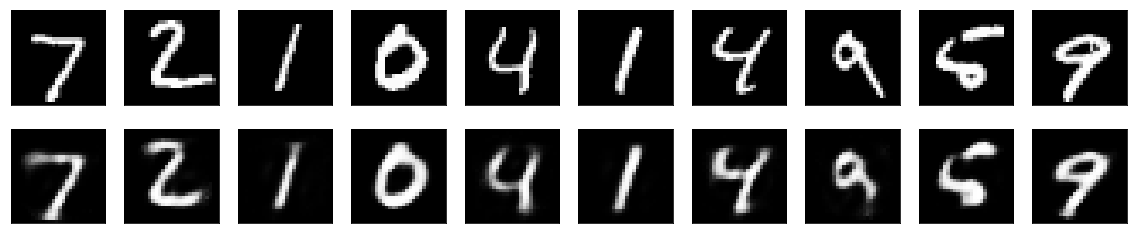

In [ ]:
# use Matplotlib (don't ask)
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# denoising autoencoder

In [208]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  
print ("PACKAGES LOADED")

PACKAGES LOADED


In [210]:
mnist = input_data.read_data_sets('mnist/', one_hot=True)
train_X   = mnist.train.images
train_Y = mnist.train.labels
test_X    = mnist.test.images
test_Y  = mnist.test.labels
print ("mnist ready")

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz
MNIST ready


In [213]:
print (train_X.shape)
train_X

(55000, 784)


array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [214]:
print (train_Y.shape)
train_Y

(55000, 10)


array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [216]:
n_input    = 784 
n_hidden_1 = 256 
n_hidden_2 = 256 
n_output   = 784 

In [217]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_output])
dropout_keep_prob = tf.placeholder("float")

In [218]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_output]))
}

In [220]:
def denoise_auto_encoder(_X, _weights, _biases, _keep_prob):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(_X, _weights['h1']), _biases['b1']))
    layer_1out = tf.nn.dropout(layer_1, _keep_prob)
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1out, _weights['h2']), _biases['b2'])) 
    layer_2out = tf.nn.dropout(layer_2, _keep_prob) 
    return tf.nn.sigmoid(tf.matmul(layer_2out,_weights['out']) + _biases['out'])
reconstruction = denoise_auto_encoder(x, weights, biases, dropout_keep_prob)
print ('network ready')

network ready


In [221]:
cost = tf.reduce_mean(tf.pow(reconstruction-y, 2))
optm = tf.train.AdamOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()
print ('functions ready')

functions ready


In [222]:
savedir = "tmp/"
saver   = tf.train.Saver(max_to_keep=1)
print ("SAVER READY")

SAVER READY


start optimization
Epoch 00/50 average cost: 0.098945


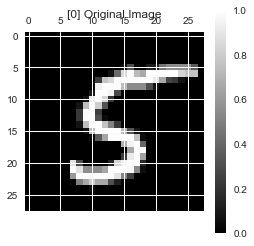

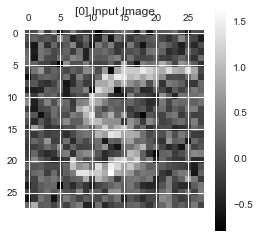

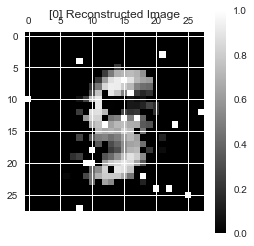

Epoch 10/50 average cost: 0.070688


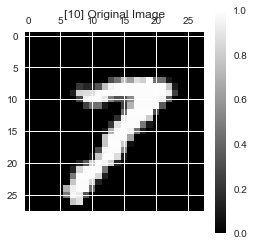

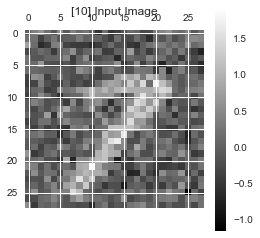

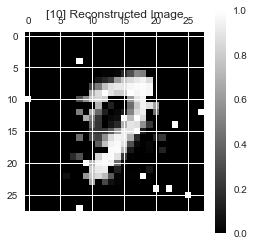

Epoch 20/50 average cost: 0.069533


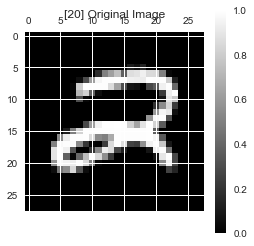

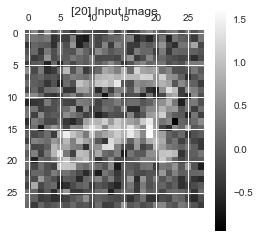

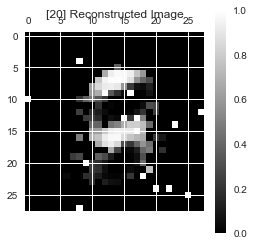

Epoch 30/50 average cost: 0.069272


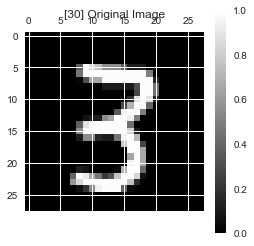

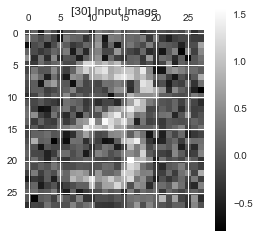

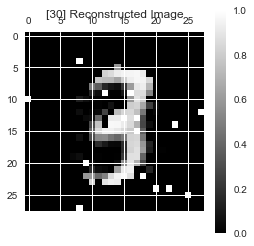

Epoch 40/50 average cost: 0.069104


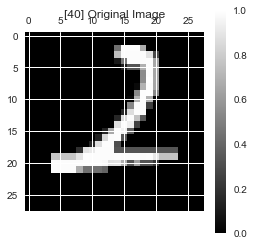

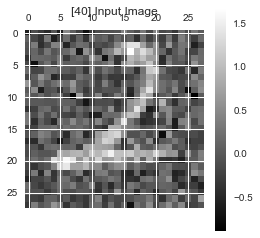

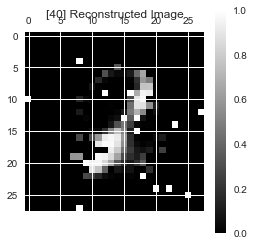

OPTIMIZATION FINISHED


In [224]:
TRAIN_FLAG = 1
epochs     = 50
batch_size = 100
disp_step  = 10
with tf.Session() as sess:
    sess.run(init)
    if TRAIN_FLAG:
        print ('start optimization')
        for epoch in range(epochs):
            num_batch = int(train_X.shape[0]/batch_size)
            total_cost = 0.
            for i in range(num_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                batch_xs_noisy = batch_xs + 0.3*np.random.randn(batch_size, 784)
                feed_dict = {x: batch_xs_noisy, y: batch_xs, dropout_keep_prob: 1.}
                sess.run(optm, feed_dict=feed_dict)
                total_cost += sess.run(cost, feed_dict=feed_dict)
                # DISPLAY
            if epoch % disp_step == 0:
                print ("Epoch %02d/%02d average cost: %.6f" 
                       % (epoch, epochs, total_cost/num_batch))
                # PLOT
                randidx  = np.random.randint(test_X.shape[0], size=1)
                testvec  = test_X[randidx, :]
                noisyvec = testvec + 0.3*np.random.randn(1, 784)
                outvec   = sess.run(reconstruction, feed_dict={x: testvec, dropout_keep_prob: 1.})
                outimg   = np.reshape(outvec, (28, 28))
                # Plot 
                plt.matshow(np.reshape(testvec, (28, 28)), cmap=plt.get_cmap('gray'))
                plt.title("[" + str(epoch) + "] Original Image")
                plt.colorbar()
                plt.show()
                plt.matshow(np.reshape(noisyvec, (28, 28)), cmap=plt.get_cmap('gray'))
                plt.title("[" + str(epoch) + "] Input Image")
                plt.colorbar()
                plt.show()
                plt.matshow(outimg, cmap=plt.get_cmap('gray'))
                plt.title("[" + str(epoch) + "] Reconstructed Image")
                plt.colorbar()
                plt.show()
            # SAVE
            saver.save(sess, savedir + 'denoise_auto_encoder.ckpt', global_step=epoch)
    print ("OPTIMIZATION FINISHED")

INFO:tensorflow:Restoring parameters from tmp/denoise_auto_encoder.ckpt-49
label is 7
Salt and Pepper Noise


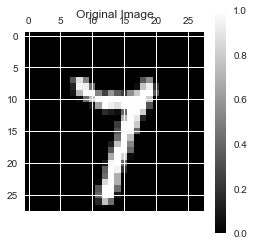

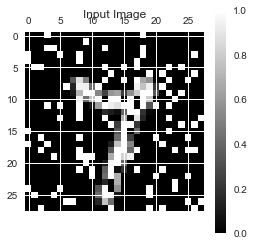

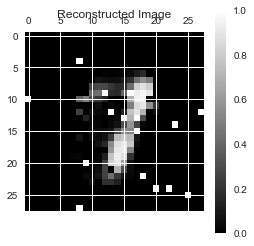

In [228]:
with tf.Session() as sess:
    sess.run(init)
# Restore
    load_epoch = 49
    saver.restore(sess, "tmp/denoise_auto_encoder.ckpt-" + str(load_epoch))
    # Test one
    randidx   = np.random.randint(test_X.shape[0], size=1)
    orgvec    = test_X[randidx, :]
    testvec   = test_X[randidx, :]
    label     = np.argmax(test_Y[randidx, :], 1)

    print ("label is %d" % (label)) 
    # Noise type
    ntype = 2 # 1: Gaussian Noise, 2: Salt and Pepper Noise
    if ntype is 1:
        print ("Gaussian Noise")
        noisyvec = testvec + 0.3*np.random.randn(1, 784)
    else:    
        print ("Salt and Pepper Noise")
        noisyvec = testvec
        rate     = 0.15
        noiseidx = np.random.randint(test_X.shape[1]
                                     , size=int(test_X.shape[1]*rate))
        noisyvec[0, noiseidx] = 1-noisyvec[0, noiseidx]

    outvec   = sess.run(reconstruction, feed_dict={x: noisyvec, dropout_keep_prob: 1})
    outimg   = np.reshape(outvec, (28, 28))

    # Plot 
    plt.matshow(np.reshape(orgvec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Original Image")
    plt.colorbar()

    plt.matshow(np.reshape(noisyvec, (28, 28)), cmap=plt.get_cmap('gray'))
    plt.title("Input Image")
    plt.colorbar()

    plt.matshow(outimg, cmap=plt.get_cmap('gray'))
    plt.title("Reconstructed Image")
    plt.colorbar()
    plt.show() 

# credit card

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
print("Total time spanning: {:.1f} days".format(df['Time'].max() / (3600 * 24.0)))
print("{:.3f} % of all transactions are fraud. ".format(np.sum(df['Class']) / df.shape[0] * 100))

Total time spanning: 2.0 days
0.173 % of all transactions are fraud. 


In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


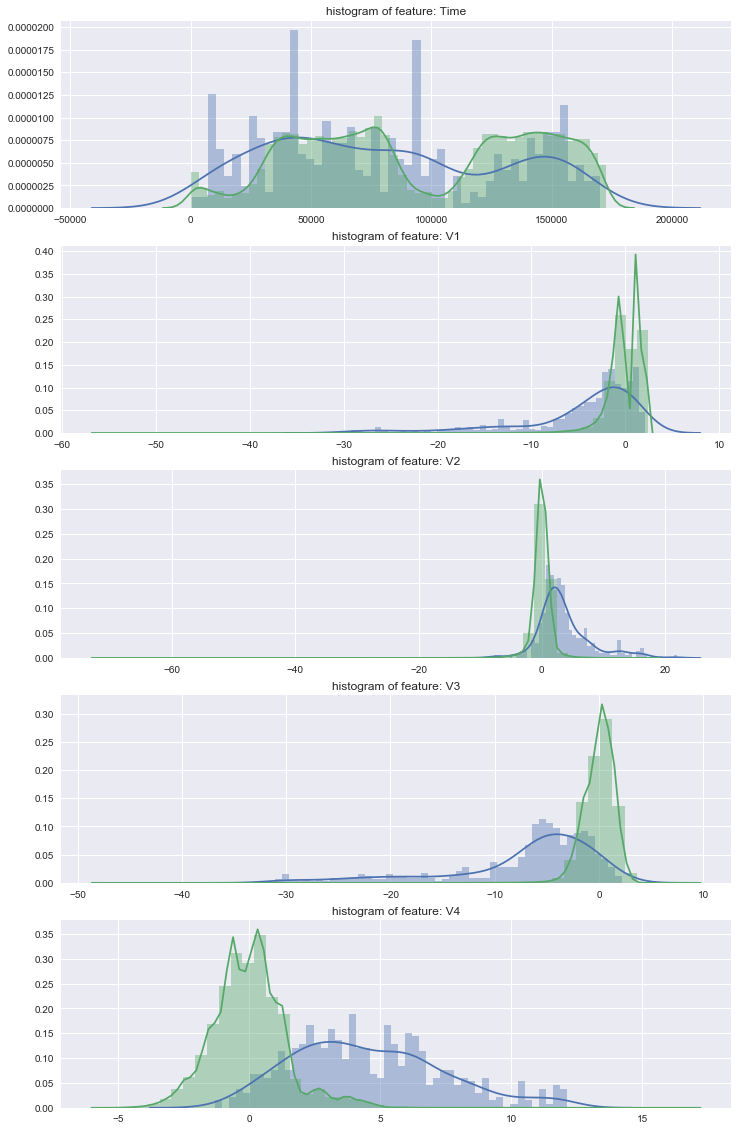

In [5]:
plt.figure(figsize=(12,5*4))
gs = gridspec.GridSpec(5, 1)
for i, cn in enumerate(df.columns[:5]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [6]:
test_ratio = 0.25
df.sort_values('Time', inplace = True)
TRA_INDEX = int((1-test_ratio) * df.shape[0])
train_x = df.iloc[:TRA_INDEX, 1:-2].values
train_y = df.iloc[:TRA_INDEX, -1].values

test_x = df.iloc[TRA_INDEX:, 1:-2].values
test_y = df.iloc[TRA_INDEX:, -1].values



In [7]:
print("Total train examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(train_x.shape[0], np.sum(train_y), np.sum(train_y)/train_x.shape[0]))

Total train examples: 213605, total fraud cases: 398, equal to 0.00186 of total cases. 


In [8]:
print("Total test examples: {}, total fraud cases: {}, equal to {:.5f} of total cases. ".format(test_x.shape[0], np.sum(test_y), np.sum(test_y)/test_y.shape[0]))

Total test examples: 71202, total fraud cases: 94, equal to 0.00132 of total cases. 


In [9]:
cols_mean = []
cols_std = []
for c in range(train_x.shape[1]):
    cols_mean.append(train_x[:,c].mean())
    cols_std.append(train_x[:,c].std())
    train_x[:, c] = (train_x[:, c] - cols_mean[-1]) / cols_std[-1]
    test_x[:, c] =  (test_x[:, c] - cols_mean[-1]) / cols_std[-1]

In [10]:
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1

n_hidden_1 = 15
n_input = train_x.shape[1]

In [14]:
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
    #'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_input])),
    #'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   #biases['encoder_b2']))
    return layer_1


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.tanh(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    #layer_2 = tf.nn.tanh(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                  # biases['decoder_b2']))
    return layer_1

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define batch mse
batch_mse = tf.reduce_mean(tf.pow(y_true - y_pred, 2), 1)

# Define loss and optimizer, minimize the squared error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# TRAIN StARTS
save_model = os.path.join(data_dir, 'temp_saved_model_1layer.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_x.shape[0]/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_x.shape[0], batch_size)
            batch_xs = train_x[batch_idx]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            print (batch_mse)
            train_batch_mse = sess.run(batch_mse, feed_dict={X: train_x})
            print (train_batch_mse)
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  "Train auc=", "{:.6f}".format(auc(train_y, train_batch_mse)), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)

Tensor("Mean_2:0", shape=(?,), dtype=float32)
[ 0.09750523  0.05477717  0.71500713 ...,  0.05796784  0.12601201
  0.24431838]
Epoch: 0001 cost= 1.278787017 Train auc= 0.957319 Time elapsed= 0:00:01.710055
Tensor("Mean_2:0", shape=(?,), dtype=float32)
[ 0.09339844  0.06193215  0.55215532 ...,  0.05309964  0.13690677
  0.24071749]
Epoch: 0002 cost= 0.554931104 Train auc= 0.955515 Time elapsed= 0:00:03.233593
Tensor("Mean_2:0", shape=(?,), dtype=float32)
[ 0.09142995  0.06246547  0.53658867 ...,  0.06170058  0.13071658
  0.24074154]
Epoch: 0003 cost= 0.537267506 Train auc= 0.954578 Time elapsed= 0:00:04.631097
Tensor("Mean_2:0", shape=(?,), dtype=float32)
[ 0.09781737  0.06649724  0.58462203 ...,  0.07150473  0.12653507
  0.2437644 ]
Epoch: 0004 cost= 0.661942184 Train auc= 0.953936 Time elapsed= 0:00:05.980426
Tensor("Mean_2:0", shape=(?,), dtype=float32)
[ 0.10591494  0.08198445  0.50793272 ...,  0.05879316  0.13802356
  0.23865914]
Epoch: 0005 cost= 0.635309815 Train auc= 0.953599 Time

In [18]:
with tf.Session() as sess:
    now = datetime.now()
    saver.restore(sess, save_model)
    test_batch_mse = sess.run(batch_mse, feed_dict={X: test_x})
    print("Test auc score: {:.6f}".format(auc(test_y, test_batch_mse)))

INFO:tensorflow:Restoring parameters from /Users/bgg/training_course/lib/python2.7/site-packages/skimage/data/temp_saved_model_1layer.ckpt
Test auc score: 0.943762


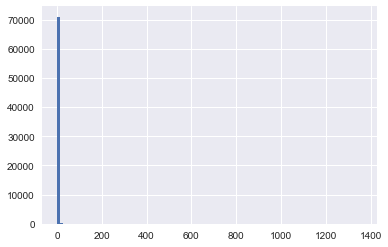

In [25]:
plt.hist(test_batch_mse, bins = 100)
plt.show()

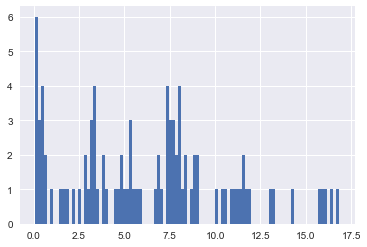

In [26]:
plt.hist(test_batch_mse[test_y == 1.0], bins = 100)
plt.show()

In [30]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    saver.restore(sess, save_model)
    
    test_encoding = sess.run(encoder_op, feed_dict={X: test_x})
    train_encoding = sess.run(encoder_op, feed_dict={X: train_x})
    
    print("Dim for test_encoding and train_encoding are: \n", test_encoding.shape, '\n', train_encoding.shape)

INFO:tensorflow:Restoring parameters from /Users/bgg/training_course/lib/python2.7/site-packages/skimage/data/temp_saved_model_1layer.ckpt
Dim for test_encoding and train_encoding are: 
 (71202, 15) 
 (213605, 15)


In [ ]:
n_input = test_encoding.shape[1]

hidden_size = 4
output_size = 2

X = tf.placeholder(tf.float32, [None, n_input], name = 'input_x')
y_ = tf.placeholder(tf.float32, shape=[None , output_size], name= 'target_y')

weights = {
    'W1': tf.Variable(tf.truncated_normal([n_input, hidden_size])),
    'W2': tf.Variable(tf.truncated_normal([hidden_size, output_size])),
}
biases = {
    'b1': tf.Variable(tf.zeros([hidden_size])),
    'b2': tf.Variable(tf.zeros([output_size])),
}

hidden_layer =  tf.nn.relu(tf.add(tf.matmul(X, weights['W1']), biases['b1']))
pred_logits = tf.add(tf.matmul(hidden_layer, weights['W2']), biases['b2'])
pred_probs = tf.nn.softmax(pred_logits)

cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=pred_logits))

optimizer = tf.train.AdamOptimizer(2e-4).minimize(cross_entropy)


In [33]:
n_epochs = 70
batch_size = 256

# PREPARE DATA
VAL_PERC = 0.2
all_y_bin = np.zeros((df.shape[0], 2))

In [173]:
n_epochs = 70
batch_size = 256

# PREPARE DATA
VAL_PERC = 0.2
all_y_bin = np.zeros((df.shape[0], 2))
all_y_bin[range(df.shape[0]), df['Class'].values] = 1

train_enc_x = train_encoding[:int(train_encoding.shape[0] * (1-VAL_PERC))]
train_enc_y = all_y_bin[:int(train_encoding.shape[0] * (1-VAL_PERC))]

val_enc_x = train_encoding[int(train_encoding.shape[0] * (1-VAL_PERC)):]
val_enc_y = all_y_bin[int(train_encoding.shape[0] * (1-VAL_PERC)):train_encoding.shape[0]]

test_enc_y = all_y_bin[train_encoding.shape[0]:]
print("Num of data for train, val and test are: \n{}, \n{}, \n{}".format(train_enc_x.shape[0], val_enc_x.shape[0], \
                                                                        test_encoding.shape[0]))

# TRAIN STARTS
save_model = os.path.join(data_dir, 'temp_saved_model_FCLayers.ckpt')
saver = tf.train.Saver()

# Initializing the variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    now = datetime.now()
    sess.run(init)
    total_batch = int(train_enc_x.shape[0]/batch_size)
    # Training cycle
    for epoch in range(n_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_idx = np.random.choice(train_enc_x.shape[0], batch_size)
            batch_xs = train_enc_x[batch_idx]
            batch_ys = train_enc_y[batch_idx]
            print (batch_xs)
            print (batch_ys)

            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cross_entropy], feed_dict={X: batch_xs, y_: batch_ys})
            
        # Display logs per epoch step
        if epoch % display_step == 0:
            val_probs = sess.run(pred_probs, feed_dict={X: val_enc_x})
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c), 
                  "Val auc=", "{:.6f}".format(auc(val_enc_y[:, 1], val_probs[:, 1])), 
                  "Time elapsed=", "{}".format(datetime.now() - now))

    print("Optimization Finished!")
    
    save_path = saver.save(sess, save_model)
    print("Model saved in file: %s" % save_path)

Num of data for train, val and test are: 
170884, 
42721, 
71202
[[-0.16776246  0.5622279   0.06679852 ..., -0.14125454  0.03315114
  -0.54569048]
 [ 0.10825358  0.54688013  0.42658266 ...,  0.20680645 -0.24297801
  -0.39551401]
 [ 0.20549259  0.39603418  0.06012892 ..., -0.23478784  0.51242799
   0.05053722]
 ..., 
 [-0.20346759  0.42886779  0.7310099  ...,  0.28631967 -0.13821082
  -0.02782431]
 [ 0.2796095   0.37817192  0.53605956 ...,  0.16120031 -0.1352848
   0.25500035]
 [ 0.71188325  0.08007757  0.01216344 ..., -0.58726364 -0.53522265
  -0.26630965]]
[[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  

NameError: name 'cross_entropy' is not defined

In [176]:
all_y_bin = np.zeros((df.shape[0], 2))
all_y_bin[range(df.shape[0]), df['Class'].values] = 1
all_y_bin

array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.]])

In [198]:
all_y_bin[3,:2]

array([ 1.,  0.])

In [192]:
all_y_bin[3,[1,1,1]]

array([ 0.,  0.,  0.])

In [193]:
all_y_bin[3,[0,0,0]]

array([ 1.,  1.,  1.])

In [182]:
all_y_bin[1,]

array([ 1.,  0.])

In [203]:
df['Class'].values

array([0, 0, 0, ..., 0, 0, 0])

In [207]:
all_x = np.zeros((df.shape[0], 2))
#all_x[range(df.shape[0]), df['Class'].values] = 3
all_x[range(3), [1,1,1]] = 3
all_x

array([[ 0.,  3.],
       [ 0.,  3.],
       [ 0.,  3.],
       ..., 
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])